<a href="https://colab.research.google.com/github/Vcetpreeti/DS/blob/main/prodigy_DS_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

#import libraries

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


df=pd.read_csv("twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
df.shape

(53826, 4)

In [9]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    492
dtype: int64

In [11]:
col_names=['ID','entity','Sentiment','Tweets']
df.columns=col_names
df.head()

,ID,entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.isnull().sum()

ID             0
entity         0
Sentiment      0
Tweets       492
dtype: int64

In [15]:
#drop null values
df.dropna(subset=['Tweets'], inplace=True)

In [16]:
df.head()

,ID,entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
df.shape

(53334, 4)

In [19]:
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')


In [20]:
df.describe()

,ID
count,53334.000000
mean,6287.758016
std,3936.359475
min,1.000000
25%,2667.250000
50%,6186.000000
75%,9682.000000
max,13200.000000


In [23]:
df.head(500)

,ID,entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
496,2484,Borderlands,Neutral,"@Joltzdude139 v Joltz, im a big fan out seeing..."
497,2486,Borderlands,Neutral,"Guns, Love, and Tentacles is out now, and here..."
498,2486,Borderlands,Neutral,"Guns, Love, and Tentacles is out now, and here..."
499,2486,Borderlands,Neutral,"GB, Love, and Tentacles is out now, and here a..."


In [27]:
  #sentiment distribution

sentiment_counts = df['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

KeyError: 'Sentiment'

In [29]:
col_names=['ID','entity','Sentiment','Tweets']
df.columns=col_names
df.head()

,ID,entity,Sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [36]:

df['Sentiment']=df['Sentiment'].replace('Irrelevant','Neutral')
sentiment_counts = df['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

In [51]:
df.head(500)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  7 non-null      object
 1   Count      7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [54]:
entity_sentiment_counts = df.groupby(['entity', 'Sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('entity-Sentiment Relationship')
plt.show()

KeyError: 'entity'

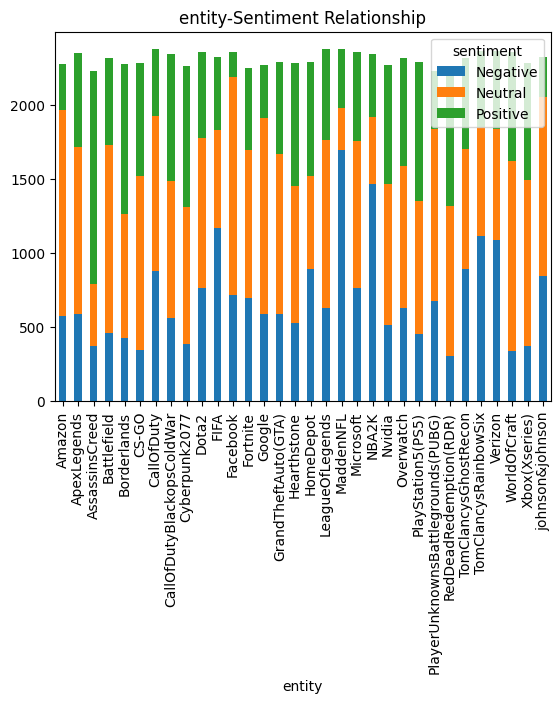

In [62]:
df=pd.read_csv("twitter_training.csv")
df.head()
col_names=['id','entity','sentiment','tweets']
df.columns=col_names
df.head()
df.dropna(subset=['tweets'],inplace=True)
df['sentiment']=df['sentiment'].replace('Irrelevant','Neutral')
entity_sentiment_counts = df.groupby(['entity', 'sentiment']).size().unstack()
entity_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('entity-Sentiment Relationship')
plt.show()

In [64]:
plot1=df.groupby(by=["entity","sentiment"]).count().reset_index()
plot1.head()

,entity,sentiment,id,tweets
0,Amazon,Negative,575,575
1,Amazon,Neutral,1393,1393
2,Amazon,Positive,308,308
3,ApexLegends,Negative,591,591
4,ApexLegends,Neutral,1128,1128


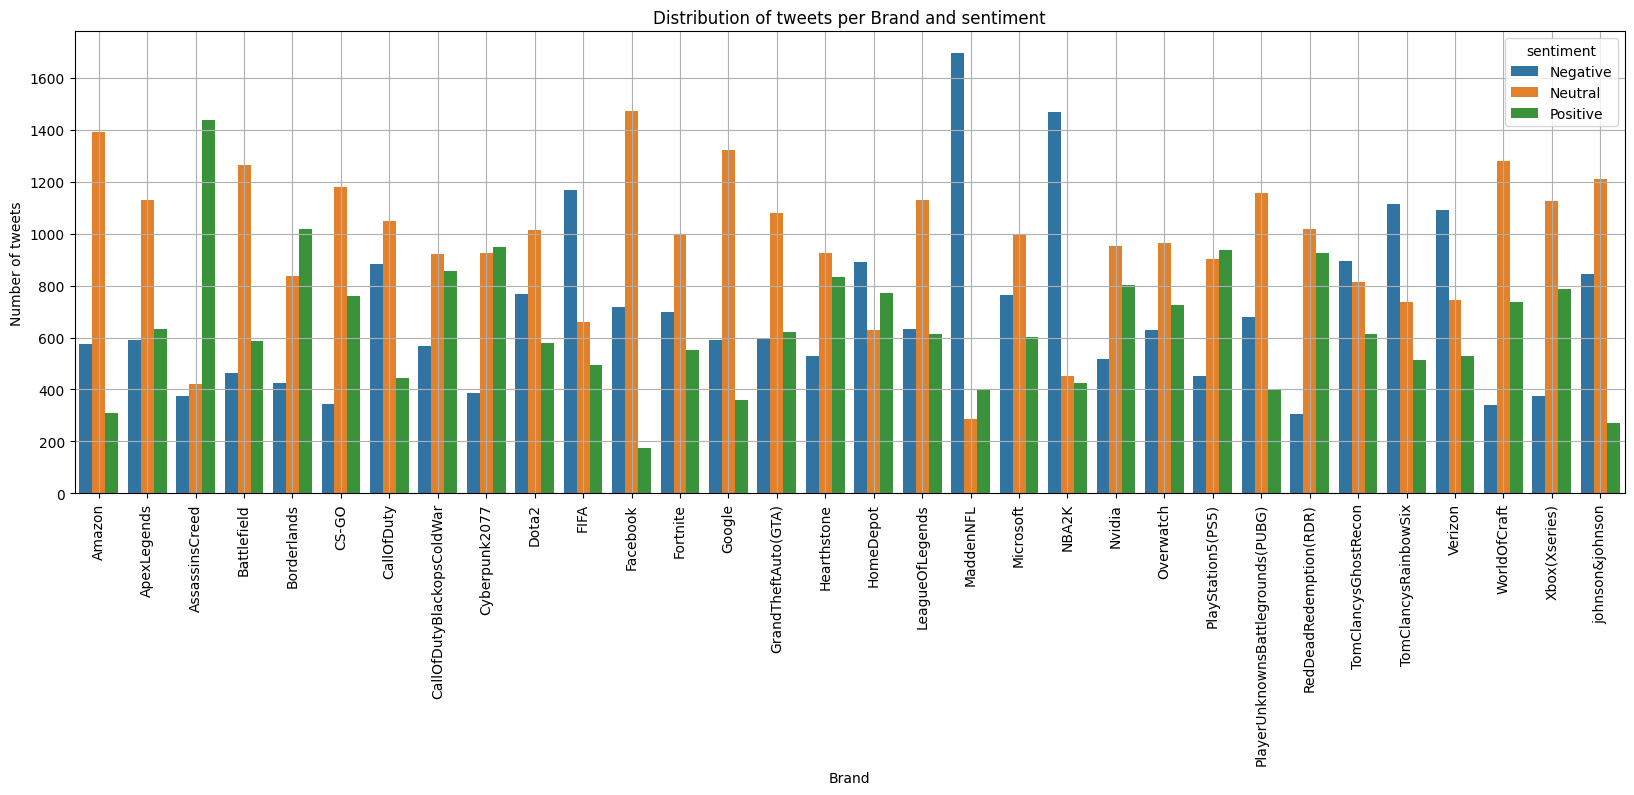

In [66]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="entity",y="id",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Brand and sentiment");

In [67]:
top3_entity_df = df['entity'].value_counts().sort_values(ascending=False)[:3]
top3_entity = top3_entity_df.index.tolist()
sentiment_by_entity = df.loc[df['entity'].isin(top3_entity)].groupby('entity')['sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']

row_n = 1
col_n = 3

fig = make_subplots(rows=row_n, cols=col_n,
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=top3_entity)

for i, col in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(labels=sentiment_labels,
                values=sentiment_by_entity[col].values,
                textinfo='percent+value+label',
                marker_colors=sentiment_colors,
                textposition='auto',
                name=col),
            row=int(i/col_n)+1, col=int(i%col_n)+1)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()

In [69]:

top10_entity_counts = df['entity'].value_counts().sort_values(ascending=False)[:10]

fig = px.bar(x=top10_entity_counts.index,
             y=top10_entity_counts.values,
             color=top10_entity_counts.values,
             text=top10_entity_counts.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Entity',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.show()